# Introduction 

Conducting multiple linear regression on the penguins dataset.

# Importing Libraries and Loading Data

### Import relevant Python libraries and modules.
These are: `pandas`, `pyplot`, `seaborn`, `ols`, `statsmodels` api, and `train_test_split`.

In [1]:
# Import libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

### Loading the penguins dataset into a DataFrame.

In [2]:
# Load the dataset

penguins = sn.load_dataset("penguins")

In [3]:
# Display the first few rows of the dataset

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Data Exploration and Cleaning

In [4]:
# Identify the number of rows and the number of columns in the data

penguins.shape

(344, 7)

In [5]:
# Basic Info

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
#Checking for null values

null_values = penguins.isna().any(axis=1).sum()
null_values

11

In [7]:
number_of_rows = penguins.shape[0]
number_of_rows

344

In [8]:
# Proportion of rows with missing values to the total rows

null_values/number_of_rows

0.03197674418604651

In [9]:
# Handle missing values

penguins = penguins.dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [10]:
penguins.shape

(333, 7)

# Exploratory Data Analysis and Regression

### Isolating the Dependent and Independent Variables

In [11]:
# Isolate the independent variables

X = penguins[["bill_length_mm", "sex", "species"]]
X.head()

,bill_length_mm,sex,species
0,39.1,Male,Adelie
1,39.5,Female,Adelie
2,40.3,Female,Adelie
4,36.7,Female,Adelie
5,39.3,Male,Adelie


In [12]:
# Isolate the dependent variable

y = penguins[["body_mass_g"]]
y.head()

,body_mass_g
0,3750.0
1,3800.0
2,3250.0
4,3450.0
5,3650.0


### Spliting the Data into a Train Set and Test Set

In [13]:
# Split the dataset into 70% training set and 30% testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
X_train.head(2)

,bill_length_mm,sex,species
27,40.5,Female,Adelie
292,48.2,Male,Gentoo


In [15]:
X_test.head(2)

,bill_length_mm,sex,species
30,39.5,Female,Adelie
317,46.9,Female,Gentoo


In [16]:
y_train.head(2)

,body_mass_g
27,3200.0
292,5100.0


In [17]:
y_train.head(2)

,body_mass_g
27,3200.0
292,5100.0


### Building the Model Implement the Ordinary Least Squares (OLS) approach.

In [18]:
# Specify the OLS formula
# C specifies the categorical variables

ols_formula = "body_mass_g ~ bill_length_mm + C(sex) + C(species)"
ols_formula

'body_mass_g ~ bill_length_mm + C(sex) + C(species)'

In [19]:
# Specify the data that will be used for OLS

ols_data = pd.concat([X_train, y_train], axis = 1)
ols_data.head()

,bill_length_mm,sex,species,body_mass_g
27,40.5,Female,Adelie,3200.0
292,48.2,Male,Gentoo,5100.0
302,47.4,Female,Gentoo,4725.0
62,37.6,Female,Adelie,3600.0
181,52.8,Male,Chinstrap,4550.0


In [20]:
# Instantiate OLS object

OLS = ols(formula = ols_formula, data = ols_data)
OLS

In [21]:
# Fit the OLS object to the training data

model = OLS.fit()
model

### Overview of the Model. Checking Model Assumptions.

<function matplotlib.pyplot.show(close=None, block=None)>

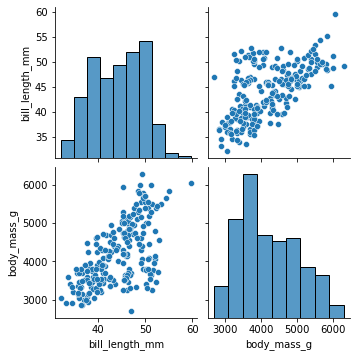

In [22]:
# View the pairwise relationships between variables 
# (Normality, linearity, independence, homoscedasticity)

sn.pairplot(data = ols_data)
plt.show

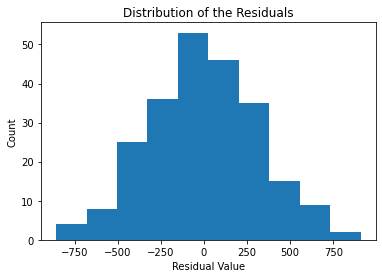

In [23]:
# Normality

residuals = model.resid
plt.hist(residuals)
plt.title("Distribution of the Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.show()

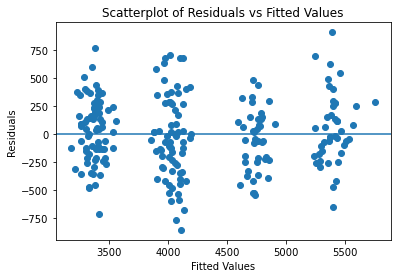

In [24]:
# Homoscedasticity

fitted_values = model.predict(X_train)

plt.scatter(fitted_values, residuals)
plt.axhline(0)
plt.title("Scatterplot of Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


In [25]:
# Display summary of model results

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.31e-92
Time:                        23:36:34   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(sex)[T.Male]            528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using the Model to Make Predictions

In [26]:
# Use the model to make predictions on the test data

predictions = model.predict(X_test)
predictions

30     3436.455443
317    4781.153714
79     4057.837531
201    3517.238973
63     4022.287040
          ...     
20     3376.019609
7      3954.741109
215    4259.492729
99     4096.943070
35     3954.741109
Length: 100, dtype: float64

In [29]:
body_mass_prediction = model.predict(X)

penguins['body_mass_prediction'] = body_mass_prediction

penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_prediction
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3951.186060
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3436.455443
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3464.895835
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3336.914070
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3958.296158
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female,3415.125148
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male,3954.741109
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female,3493.336227
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male,3933.410815
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male,3791.208853
